In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

In [2]:
data=pd.read_csv(r"C:\Users\Theenesh\Downloads\Breast_cancer_data.csv")

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [5]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
cor=data.corr()
corr=cor['diagnosis'].sort_values(ascending=False)
print(corr)

diagnosis          1.000000
mean_smoothness   -0.358560
mean_texture      -0.415185
mean_area         -0.708984
mean_radius       -0.730029
mean_perimeter    -0.742636
Name: diagnosis, dtype: float64


In [9]:
feat = data.drop(columns='diagnosis')

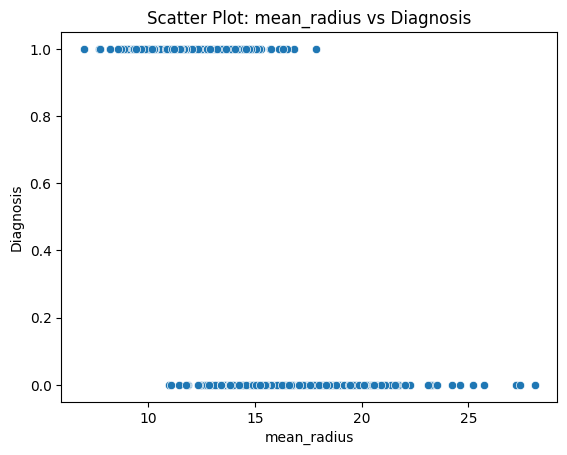

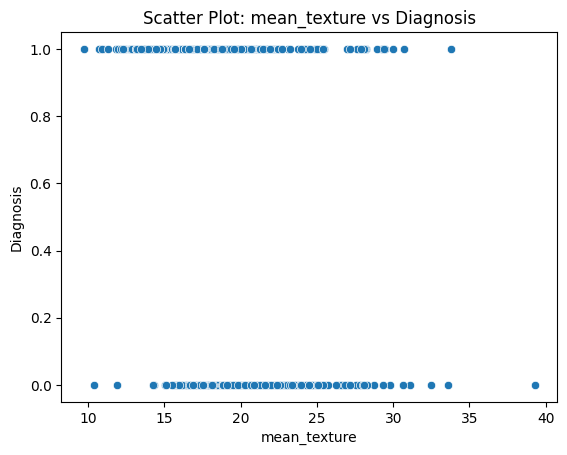

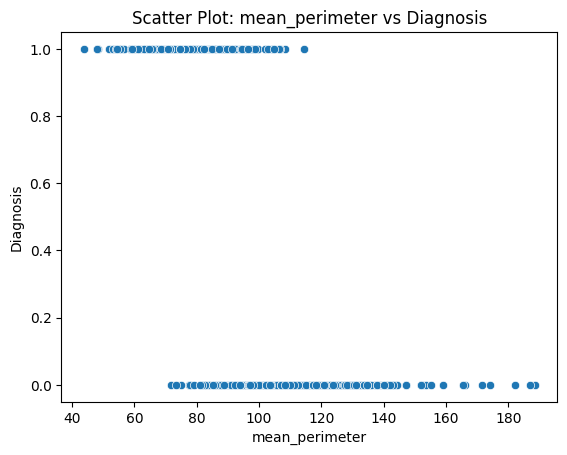

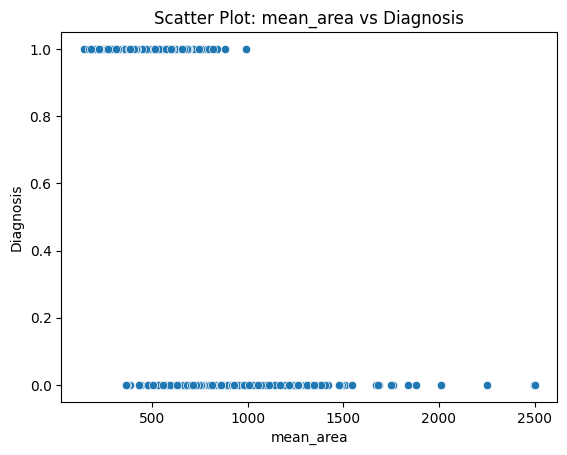

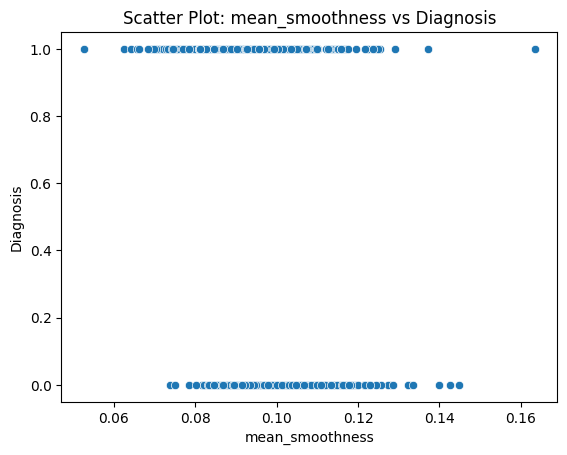

In [10]:
for feature in feat:
    sns.scatterplot(x=feature, y='diagnosis', data=data)  
    plt.title(f'Scatter Plot: {feature} vs Diagnosis')  
    plt.xlabel(feature)  
    plt.ylabel('Diagnosis') 
    plt.show()  

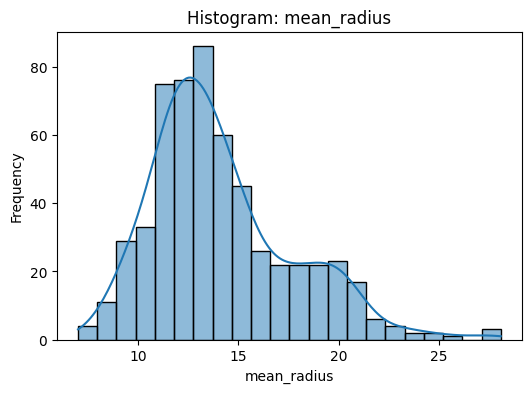

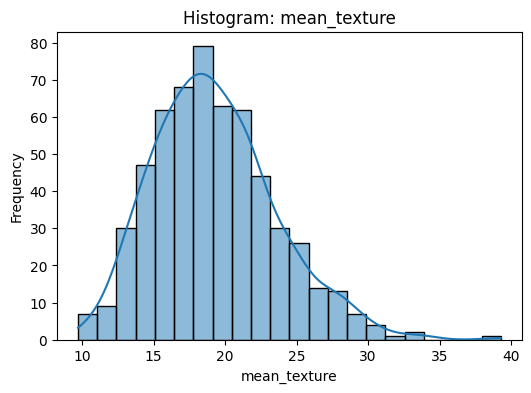

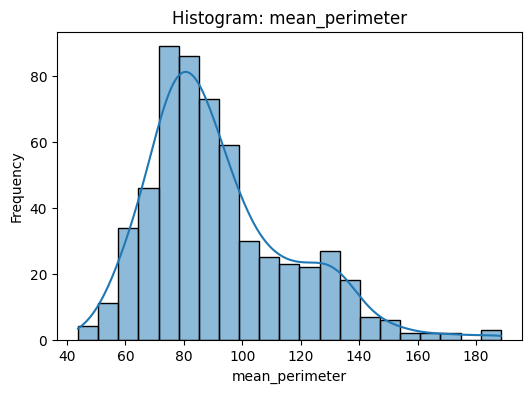

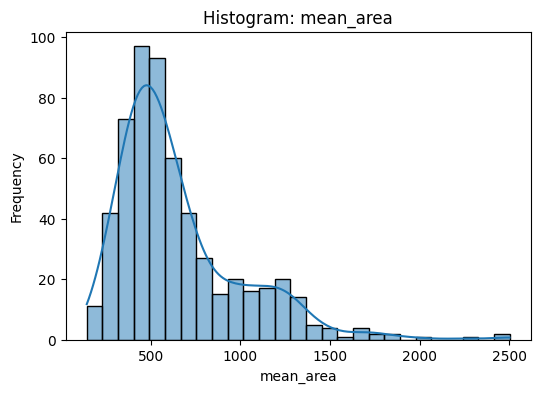

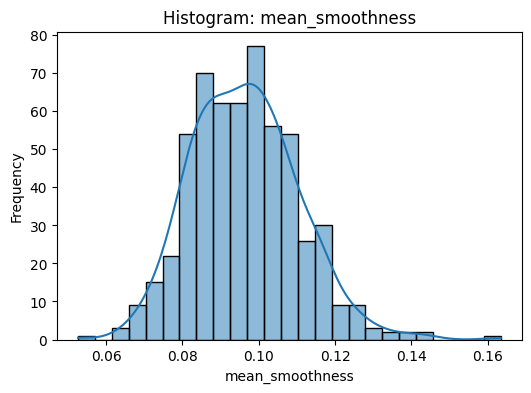

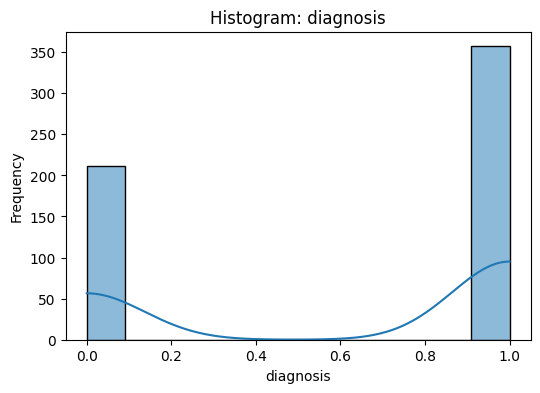

In [11]:
features = data.columns

# Create a histogram for each feature
for feature in features:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.histplot(data[feature], kde=True)  # Create the histogram with a kernel density estimate (KDE)
    plt.title(f'Histogram: {feature}')  # Add a title
    plt.xlabel(feature)  # Label the x-axis
    plt.ylabel('Frequency')  # Label the y-axis
    plt.show()  # Display the plot

In [12]:
x = data.iloc[ : , :-1].values
y = data.iloc[ : , -1].values

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)

In [14]:
#y_test=np.reshape(y_test,(x_test.shape[0],1))
#y_train=np.reshape(y_train,(y_train.shape[0],1))

In [15]:
print(np.unique(data['diagnosis'],return_counts=True))

(array([0, 1], dtype=int64), array([212, 357], dtype=int64))


In [16]:
def gini(y):
    cls,counts=np.unique(y,return_counts=True)
    gimpurity=1.0
    for count in counts:
        gimpurity-=(count/len(y))**2
    return gimpurity

def split(x,y,limit,feature):
    left=x[ :, feature]<=limit
    right=x[:, feature]>limit
    return x[left],x[right],y[left],y[right]

def bestsplit(x,y):
    bestgini=float('inf')
    bestsplit=None

    nooffeatures=x.shape[1]
    for features in range(nooffeatures):
        limits=np.unique(x[: ,features])
        for limit in limits:
            xleft,xright,yleft,yright=split(x,y,limit,features)

            if len(yleft)==0 or len(yright)==0:
                continue

            gleft=gini(yleft)
            gright=gini(yright)

            numerator=len(yleft)*gleft+len(yright)*gright
            terminator=len(yleft)+len(yright)
            weighted=numerator/terminator
            if weighted<bestgini:
                bestgini=weighted
                bestsplit={
                    'feature_index':features,
                    'limit':limit,
                    'xleft':xleft,
                    'xright':xright,
                    'yleft':yleft,
                    'yright':yright
                    
                }

    return bestsplit



def build_tree(x, y, cur_depth = 0, max_depth = None, min_splits = 2):
    
    n, m = x.shape

    if cur_depth >= max_depth or len(np.unique(y)) == 1 or n < min_splits:
        return np.bincount(y).argmax()
    
    best_split = bestsplit(x, y)
    if best_split is None:
        return np.bincount(y).argmax()
    
    left_subtree = build_tree(best_split['xleft'], best_split['yleft'], cur_depth + 1, max_depth, min_splits)
    right_subtree = build_tree(best_split['xright'], best_split['yright'], cur_depth + 1, max_depth, min_splits)
    
    return {
        'feature_index' : best_split['feature_index'],
        'limit' : best_split['limit'],
        'left' : left_subtree, 
        'right' : right_subtree
    }

In [17]:
def predict_sample(X, tree):
    if isinstance(tree, dict):
        feature_value = X[tree['feature_index']]
        if feature_value <= tree['limit']:
            return predict_sample(X, tree['left'])
        else:
            return predict_sample(X, tree['right'])
    else:
        return tree
    
def predict(X, tree):
    return [predict_sample(x, tree) for x in X]


In [18]:
tree = build_tree(x_train, y_train, 0, max_depth = 5, min_splits = 2)
y_pred = predict(x_test, tree)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy : {accuracy : .4f}')
print(f'Precision : {precision : .4f}')
print(f'Recall : {recall : .4f}')
print(f'Confusion Matrix :\n{conf_matrix}')

Accuracy :  0.9298
Precision :  0.9565
Recall :  0.9296
Confusion Matrix :
[[40  3]
 [ 5 66]]


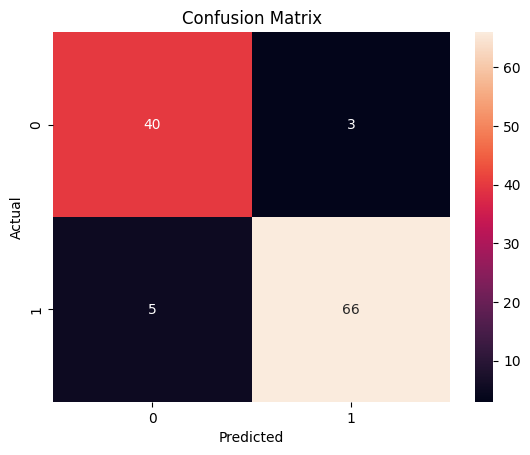

In [20]:
sns.heatmap(conf_matrix,annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

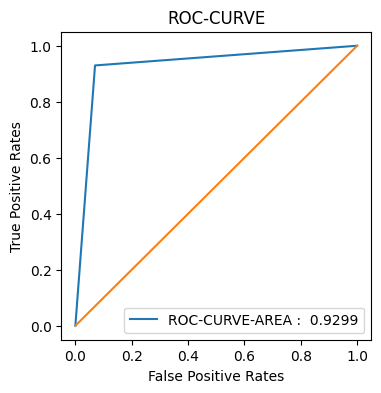

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_area = auc(fpr, tpr)
plt.figure(figsize = (4, 4))
plt.plot(fpr, tpr, label = f"ROC-CURVE-AREA : {roc_area : .4f}")
plt.plot([0, 1], [0, 1])
plt.title('ROC-CURVE')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.legend()
plt.show()

In [27]:
import numpy as np

new_sample = np.array([21.56, 22.39, 142.00, 1479.0, 0.11100])
new_sample = new_sample.reshape(1, -1)  

predicted_class = predict(new_sample, tree)  # Predict
print(f"Predicted class for new input: {predicted_class[0]}")


Predicted class for new input: 0
